# 문제: 분류 모델
- 분류(classification): 카테고리 구분을 예측하는 것
- 컨퓨전 매트릭스를 이해하고 분류의 성능 지표인 정확도(accuracy), 정밀도(precision), 리콜(recall), f-1 점수를 알아본다 

# 데이터
- 남여 성별, 키, 몸무게 데이터

## import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({'font.size': 15})

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

## 데이터 읽기

In [3]:
data = pd.read_csv("https://github.com/data-labs/data/raw/main/weight-height.csv")
print(data.shape)
data[:5]

(10000, 3)


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## 전처리

In [4]:
# 성별 인코딩, 단위 변환 (인치, 파운드 --> cm, kg)
data.Gender = data.Gender.map({'Male':0, 'Female':1})
data.Height = data.Height*2.54 # cm
data.Weight = data.Weight*0.453592 # kg
data[:5]

,Gender,Height,Weight
0,0,187.571423,109.720985
1,0,174.706036,73.622732
2,0,188.239668,96.497550
3,0,182.196685,99.809504
4,0,177.499761,93.598619


In [5]:
# 백업
df = data.copy()

## 데이터 탐색

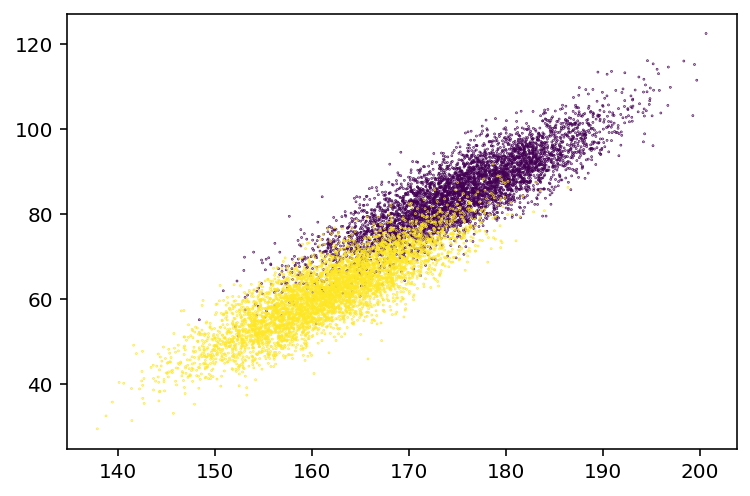

In [6]:
# 남성(0)은 갈색, 여성(1)은 노란색
plt.scatter(df.Height,df.Weight,c=df.Gender,s=0.1)

## 데이터 나누기
- 성별  예측
- X: 키와 몸무게 (2개의 특성을 사용)
- y: 성별 (남여를 구분하는 이진 분류 문제)

In [7]:
X = df[["Height", "Weight"]]
y = df.Gender

## 스케일링

In [8]:
X_sc = X.copy()
scaler = StandardScaler()
X_sc.loc[:,:] = scaler.fit_transform(X_sc)

X_train, X_test, y_train, y_test = train_test_split(X_sc, y)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((7500, 2), (2500, 2), (7500,), (2500,))

# 모델: 선형 분류

In [9]:
# 분류 모델에서 score함수는 정확도(accuracy)를 알려준다
# 선형 분류 모델로 SGDClassifier 사용
model = SGDClassifier() # (1) 모델 생성
model.fit(X_train, y_train) # (2) 훈련
model.score(X_test, y_test) # (3) 평가 (정확도)

0.9184

In [10]:
a1, a2 = model.coef_[0][0], model.coef_[0][1]
b = model.intercept_
a1, a2, b

(1.1344546115811616, -4.604479370162445, array([-0.01342201]))

## 참고: 이진 분류 결정 경계 (decision boundary)
- 하나의 변수만 사용하는 경우 결정 경계: $x_{1} > b$  
- 두 개의 변수를 사용하는 경우 결정 경계: (점수) $a_{1}x_{1}+a_{2}x_{2}+b >0$  
     > $x_{2} > -$$a_{1}\over a_{2}$ $x_{1} - $$b\over{a_{2}}$


<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-09%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%205.19.06.png?raw=1" width=500 align='left'>


(-3.0, 3.0)

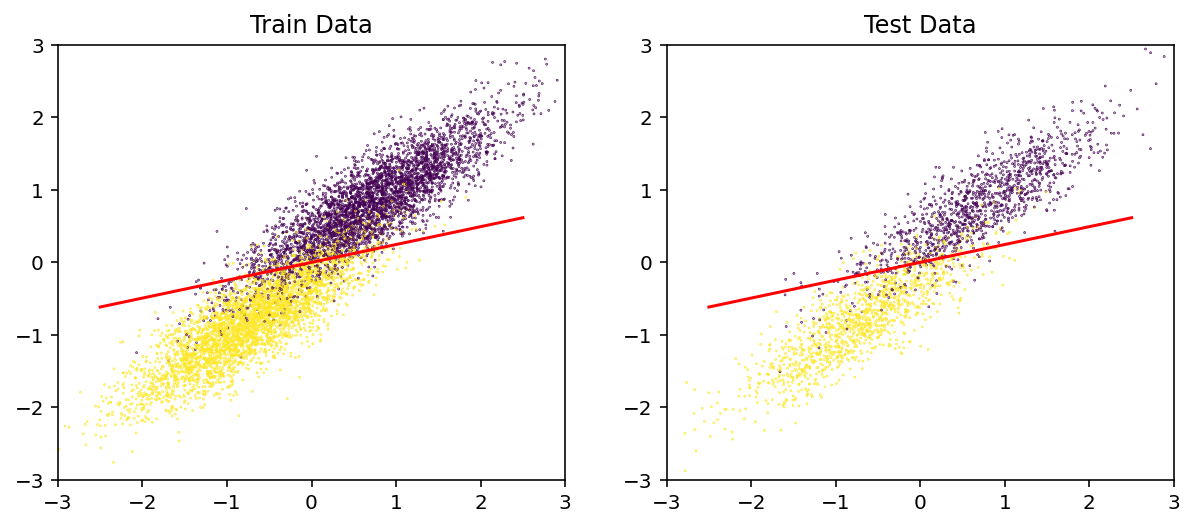

In [11]:
plt.figure(figsize=(10,4))

xs = np.array((-2.5, 2.5))
ys = -(a1/a2)*xs - b/a2
plt.plot(xs,ys, c='r')

plt.subplot(1,2,1)  
plt.title('Train Data')
plt.plot(xs,ys, c='r')
plt.scatter(X_train.Height,X_train.Weight, c=y_train, s=0.1)
plt.ylim([-3,3])
plt.xlim([-3,3])

plt.subplot(1,2,2)  
plt.title('Test Data')
plt.plot(xs,ys, c='r')
plt.scatter(X_test.Height,X_test.Weight, c=y_test, s=0.1)
plt.ylim([-3,3])
plt.xlim([-3,3])

In [12]:
# 샘플의 평균과 표준편차
scaler.mean_, scaler.scale_

(array([168.57360178,  73.22805434]), array([ 9.77223278, 14.56340284]))

# 결과
## 성능 평가
- 정확도, 정밀도, 리콜, f-1 점수

In [13]:
def show_clf_result(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [14]:
y_pred = model.predict(X_test)
show_clf_result(y_test, y_pred)

[[1131   99]
 [ 105 1165]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1230
           1       0.92      0.92      0.92      1270

    accuracy                           0.92      2500
   macro avg       0.92      0.92      0.92      2500
weighted avg       0.92      0.92      0.92      2500



## 모델 사용

In [15]:
y_pred = model.predict(X_test)
result = pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result[:20]

,y_test,y_pred
872,0,0
996,0,0
2377,0,0
1274,0,0
6768,1,1
7487,1,1
5020,1,1
2387,0,0
1378,0,0
3541,0,0


# 참고: 컨퓨전 매트릭스
- 분류의 성능을 평가하려면 먼저 컨퓨전 매트릭스를 이해해야 한다

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-07%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.44.12.png?raw=1" width=450 align='left'>



##  이진 분류 예시
 - 총 100명을 진단하고 9명을 양성이라고 예측했으나 실제로 양성은 6명, 음성은 3명
 - 91명을 음성이라고 예측했으나 실제로 음성은 87명, 양성은 4명
 
<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-07%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.49.05.png?raw=1" width=450 align='left'>

## 분류 기본 성능 평가
- Accuracy (정확도): 전체 맞춘 비율 (TP+TP) / (TP+FP+FN+FP)
- Precision: positive로 예측한 것 중 실제로 맞는 비율, TP / (TP+FP) 
- Recall (Sensitivity):  전체 positive 중 모델이 찾아낸 비율, TP / (TP+FN)
- f1-score: Precision과 Recall의 조화 평균 (2 x  Precision x Recall) /  (Precision + Recall)

- Accuracy (정확도): 93/100
- Precision: 6/9
- Recall (Sensitivity):  6/10

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-07%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.56.47.png?raw=1" width = 530 align='left'>

## 10명의 환자를 검진한 결과 예

In [16]:
np.random.seed(19)
# 10명 환자에 대한 의사의 검사 점수가 아래와 같다고 배정 (랜덤)
# 점수가 클수록 암일 가능성이 높은 것임
raw_scores = np.random.randint(30,99,10)
raw_scores

array([70, 49, 82, 61, 96, 86, 52, 64, 35, 40])

In [17]:
# 환자 명단(id)과 검사 점수 
df = pd.DataFrame({"점수":raw_scores})
df

,점수
0,70
1,49
2,82
3,61
4,96
5,86
6,52
7,64
8,35
9,40


In [18]:
# 암환자를 판정하기 위해서 점수순으로 소팅 (인덱스도 같이 소팅된다)
df = df.sort_values(['점수'], ascending=False)
df

,점수
4,96
5,86
2,82
0,70
7,64
3,61
6,52
1,49
9,40
8,35


In [19]:
# 의사의 암진단은 이진분류이므로, 암으로 판정하는 기준 점수(threshold)를 정해야 함(65점이라고 가정)
# 암 진단 대상자 표시
threshold =  65
pred_cancer = df["점수"] > threshold
pred_cancer

4     True
5     True
2     True
0     True
7    False
3    False
6    False
1    False
9    False
8    False
Name: 점수, dtype: bool

In [20]:
# 진단 컬럼을 추가 (불리언을 숫자로 변환), 10명중 4명이 암이라고 진단함
df["진단"] = pred_cancer.astype(int)
df

,점수,진단
4,96,1
5,86,1
2,82,1
0,70,1
7,64,0
3,61,0
6,52,0
1,49,0
9,40,0
8,35,0


### 실제 암 발생 데이터
- 위의 점수순 환자 명단에서, 실제로 암 발생 여부(ground-truth)가 아래와 같다고 가정
 - 나중에 정밀 검사를 해서 알아낸 것

In [21]:
# 실제로 암 발생 결과 (암 발생이면 1)
df['실제암발생'] = np.array([1,1,0,1,0,1,1,0,0,0])
df

,점수,진단,실제암발생
4,96,1,1
5,86,1,1
2,82,1,0
0,70,1,1
7,64,0,0
3,61,0,1
6,52,0,1
1,49,0,0
9,40,0,0
8,35,0,0


### 컨퓨전 매트릭스와 기본 성능 평가

In [22]:
# 예측치와 실제값
y_pred = df['진단']
y_test = df['실제암발생']

In [23]:
# 컨퓨전 매트릭스를 얻는 함수: confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[4 1]
 [2 3]]


### (주의!) 컴퓨터는 0, 1 순으로 매트릭스를 표현
- 편의상 positive를 1로 표현하고 매트릭스의 (0, 0) 위치에 기록하는 경우가 많으나 컴퓨터가 생성하는 매트릭스는 우-하 단이 1인 것에 주의해야 함

In [24]:
# 위와 같은 진단 결과에 대한 기본 성능 지표 보기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.75      0.60      0.67         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



- support는 분석에 사용된 샘플수
- macro 평균은 성능평가 점수들을 0, 1 케이스에 대해서 1:1로 산술평균을 구한 것
- weighted 평균은 샘플의 갯수를 고려하여 0, 1 케이스에 대해서 가중평균을 구한 것

- Accuracy (정확도): 전체 맞춘 비율
- Precision: positive로 예측한 것중 실제로 맞는 비율, TP / ( TP + FP ) 
- Recall (Sensitivity):  전체 positive 중 모델이 찾아낸 비율, TP / (TP+FN)
- f1-score: Precision과 Recall의 조화 평균 (2 x  Precision x Recall ) /  (Precision + Recall)

### (참고) 조화평균
- f-1 점수는 정밀도와 리콜의 조화평균(harmonic average)이다

- 점수들이 조화로울수록 (서로 차이가 작을수록) 조화평균 점수가 높다

- a, b의 산술 평균, $c = $${(a + b)}\over {2}$
- a, b의 조화 평균 $c$, ${1}\over{c}$ =  ($1\over{a}$+${1}\over{b}$) $/ 2$   
> $c = $ ${2ab}\over{(a+b)}$

In [25]:
# 예: 학생 3명의 국어, 수학 성적
df1 = pd.DataFrame({"국어": [20, 40, 60, 80], "수학": [100, 80, 60, 40]})
df1

,국어,수학
0,20,100
1,40,80
2,60,60
3,80,40


In [26]:
# 산술평균과 조화평균을 비교
# 산술평균(arithmetic average)은 조화를 측정하지 못한다

df1["산술평균"] = (df1['국어']+df1['수학'])/2
df1["조화평균"] = 2*df1['국어']*df1['수학']/(df1['국어']+df1['수학'])
df1.round(1)

,국어,수학,산술평균,조화평균
0,20,100,60.0,33.3
1,40,80,60.0,53.3
2,60,60,60.0,60.0
3,80,40,60.0,53.3


# 결과: 성별 분류 다시 보기

- 성별 분류 모델

In [27]:
df = data.copy()
X = df[["Height", "Weight"]]
y = df.Gender
X_sc = X.copy()
scaler = StandardScaler()
X_sc.loc[:,:] = scaler.fit_transform(X_sc)

X_train, X_test, y_train, y_test = train_test_split(X_sc, y)
model = SGDClassifier() # (1) 모델 생성
model.fit(X_train, y_train) # (2) 훈련
model.score(X_test, y_test) # (3) 평가 (정확도)

0.9184

In [28]:
scaler.mean_, scaler.scale_

(array([168.57360178,  73.22805434]), array([ 9.77223278, 14.56340284]))

In [29]:
y_pred = model.predict(X_test)
show_clf_result(y_test, y_pred)

[[1175   83]
 [ 121 1121]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1258
           1       0.93      0.90      0.92      1242

    accuracy                           0.92      2500
   macro avg       0.92      0.92      0.92      2500
weighted avg       0.92      0.92      0.92      2500



## 분류 점수

- 점수를 사용하는 모델: 선형모델, SVM
- 확률을 사용하는 모델(predict_proba()): 트리계열, 랜덤포레스트, 부스팅, 로지스틱회귀, 신경망

In [30]:
model.decision_function(X_test) 

array([-4.94368197, -3.63951309, -4.21365805, ...,  1.0728945 ,
        2.98813113, -0.06881786])

In [31]:
df = X_test.copy()
df["score"] = model.decision_function(X_test).round(1)
df

,Height,Weight,score
1044,0.860749,1.304291,-4.9
2869,1.716181,1.216886,-3.6
3984,1.112741,1.197683,-4.2
8652,-1.697673,-1.811901,5.6
6,0.628362,0.700397,-2.6
...,...,...,...
8879,-0.452691,-0.514377,1.4
4801,1.494942,1.372009,-4.5
9735,0.084297,-0.299857,1.1
6430,-0.546821,-0.908131,3.0


In [32]:
# N개의 테스트 샘플만 관찰하겠다
N=50
df2 = df[:N]
df2

,Height,Weight,score
1044,0.860749,1.304291,-4.9
2869,1.716181,1.216886,-3.6
3984,1.112741,1.197683,-4.2
8652,-1.697673,-1.811901,5.6
6,0.628362,0.700397,-2.6
9084,-0.207398,-0.730011,2.6
398,0.233617,0.966474,-4.2
3939,0.832209,1.195662,-4.5
876,1.007270,0.976607,-3.4
4591,1.205859,0.976559,-3.2


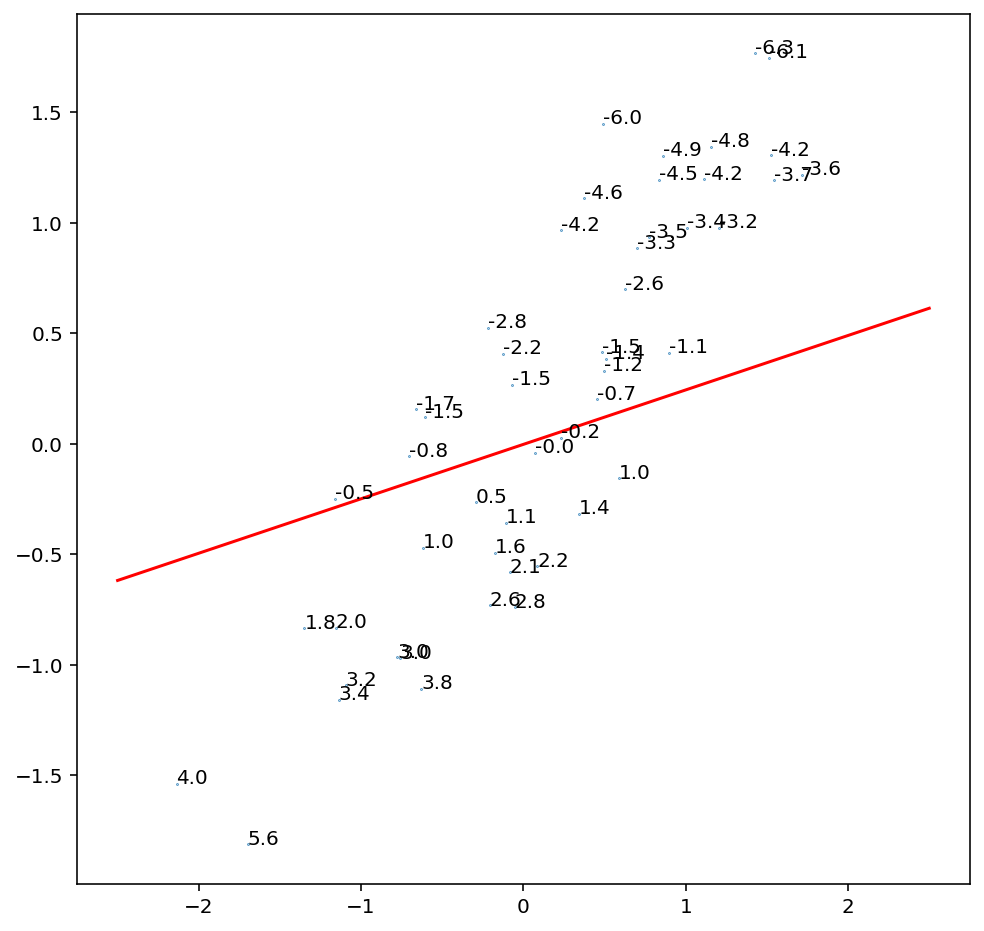

In [33]:
plt.figure(figsize=(8,8))

xs = np.array((-2.5, 2.5))
ys = -(a1/a2)*xs - b/a2
plt.plot(xs,ys, c='r')

plt.scatter(df2.Height,df2.Weight, s=0.1)
# plt.ylim([-3,3])
# plt.xlim([-3,3])

for i in range(N):
    plt.text(df2.Height.iloc[i],df2.Weight.iloc[i], 
             df2.score.values.astype(str)[i],
             fontsize=10)

In [ ]:
# 과제: 잘못 분류된 사람들의 샘플들을 출력한다 (인덱스를 먼저 구한다)
# 이들을 산포도에 그린다

In [34]:
(model.predict(X_test) != y_test).index

Int64Index([1044, 2869, 3984, 8652,    6, 9084,  398, 3939,  876, 4591,
            ...
            4742, 1733, 3886, 5000, 9275, 8879, 4801, 9735, 6430, 8348],
           dtype='int64', length=2500)

In [35]:
X_test[(model.predict(X_test) != y_test)].index

Int64Index([6744, 8634, 6434, 8310,  517, 5344,  134, 2352, 8978, 7358,
            ...
            1403, 9539,   24, 3833, 4405, 4402, 5860, 2723, 9275, 8348],
           dtype='int64', length=204)

In [39]:
#실제는 0인데 1로 예측한 사람
X_test[(y_pred < y_test)].index

Int64Index([6744, 8634, 6434, 8310, 5344, 8978, 7358, 9033, 8938, 5752,
            ...
            7074, 7348, 7844, 8940, 8592, 5968, 9539, 5860, 9275, 8348],
           dtype='int64', length=121)

In [41]:
len(X_test[(y_pred > y_test)].index)

83

In [42]:
show_clf_result(y_test,y_pred)

[[1175   83]
 [ 121 1121]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1258
           1       0.93      0.90      0.92      1242

    accuracy                           0.92      2500
   macro avg       0.92      0.92      0.92      2500
weighted avg       0.92      0.92      0.92      2500



In [43]:
df.score

1044   -4.9
2869   -3.6
3984   -4.2
8652    5.6
6      -2.6
       ... 
8879    1.4
4801   -4.5
9735    1.1
6430    3.0
8348   -0.1
Name: score, Length: 2500, dtype: float64

In [60]:
y_pred_0=df.score>1
show_clf_result(y_test, y_pred_0)

[[1229   29]
 [ 308  934]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1258
           1       0.97      0.75      0.85      1242

    accuracy                           0.87      2500
   macro avg       0.88      0.86      0.86      2500
weighted avg       0.88      0.87      0.86      2500



In [65]:
sample=[[180,90],[160,38]]
sample_sc=scaler.transform(sample)
print(sample_sc)
model.predict(sample_sc)

[[ 1.16927201  1.15165019]
 [-0.87734318 -2.41894389]]


array([0, 1])